In [24]:
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys
import import_ipynb

import copy

%run ../Codes/Data_handling.ipynb
%run ../Codes/Data_visualization.ipynb
%run ../Codes/Model.ipynb
%run ../Codes/Analysis.ipynb

318
320
50


In [6]:
G1 = read_sumo_net1('../Data/s_gyor.net.xml') # type: ignore
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
with open('../Codes/dimensions.json', 'r') as file:
    edge_dims = json.load(file)

In [22]:
%run ../Codes/Data_visualization.ipynb
with open('../gnn_outputs/edges_to_hide_10_smart.json_5k', 'r') as file:
    edges_to_hide = json.load(file)

data_train = torch.load('../Data/data_train.pth')
data_test = torch.load('../Data/data_test.pth')

prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, summa = data_preparation(data_train, data_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../gnn_outputs/gnn_model_ces_10_smart_5k.pth'))
output = model2(prepared_training_data_hiden[2].edge_attr, prepared_training_data_hiden[2].edge_index)

In [25]:
maxdif_s_30 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2]," zone based 10%" )
maxdif_s_30_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2], " zone based 10%" )

IndexError: list index out of range

<Figure size 1600x900 with 0 Axes>

In [26]:

maxdif_s_20 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2], " zone based 20%"  )
maxdif_s_20_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2], " zone based 20%"  )

IndexError: list index out of range

<Figure size 1600x900 with 0 Axes>

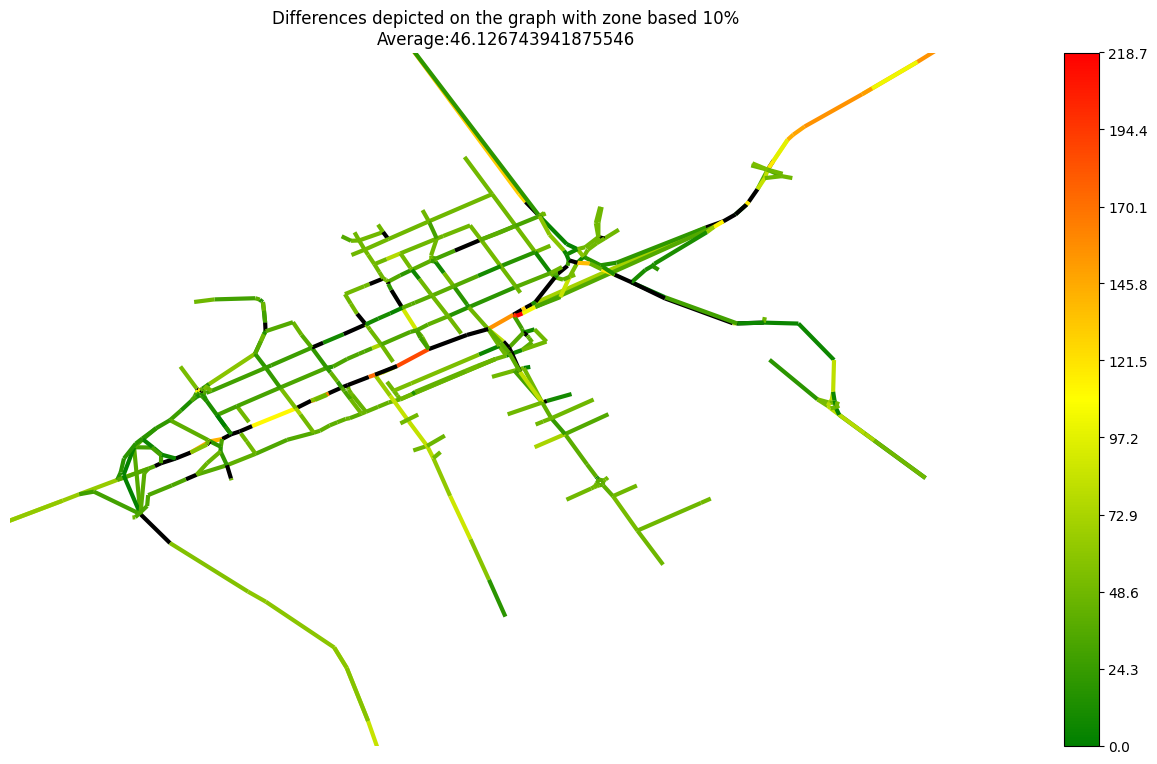

C:\Users\nemes\AppData\Local\Temp\ipykernel_12736\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


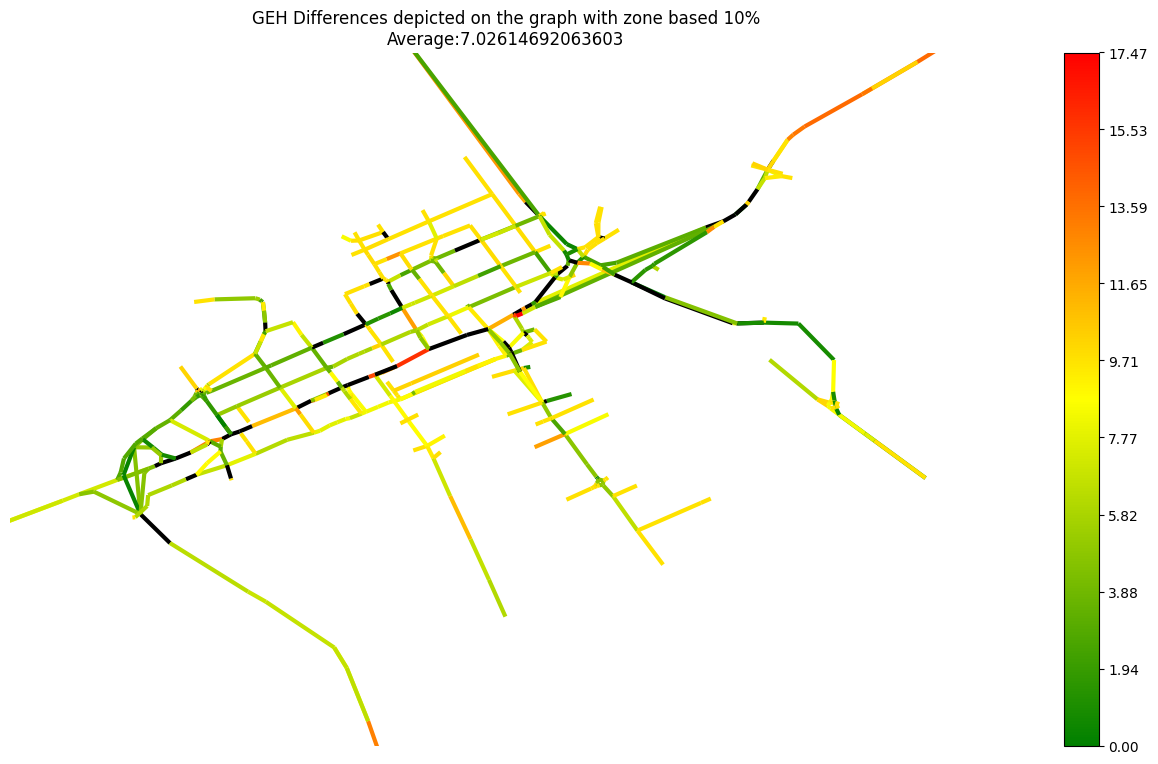

In [23]:

maxdif_s_10 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2], " zone based 10%"  )
maxdif_s_10_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2], " zone based 10%"  )

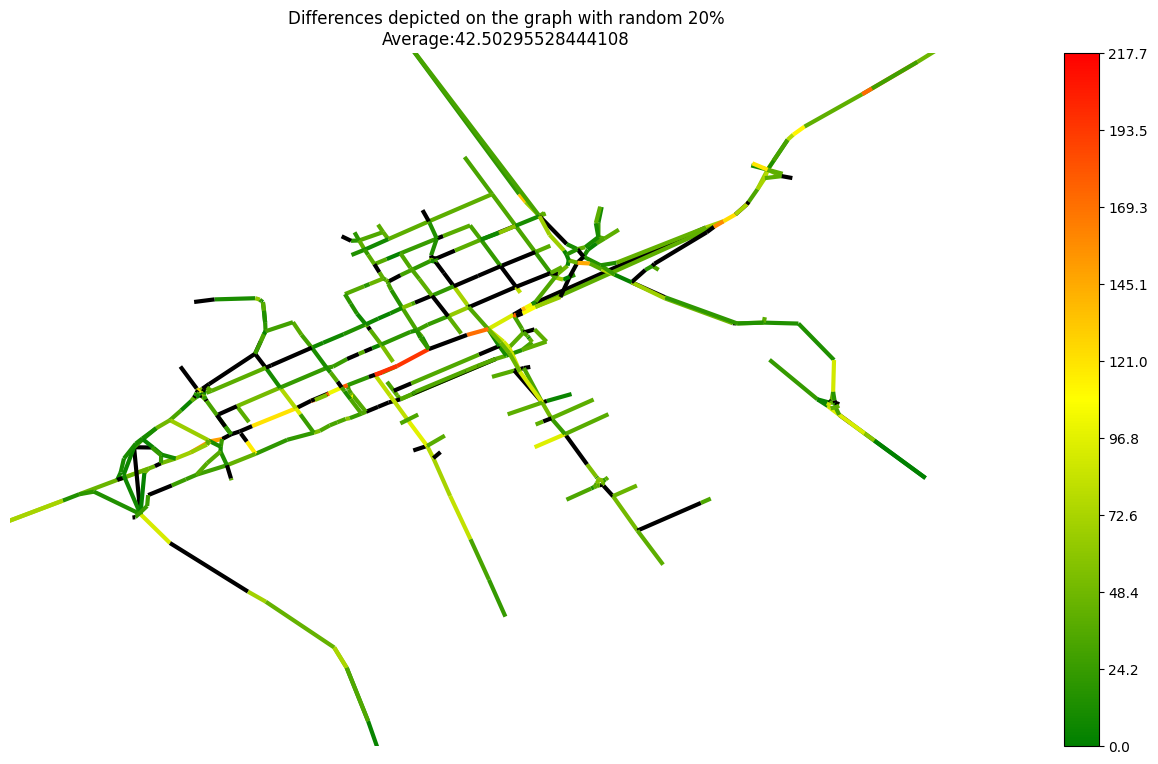

C:\Users\nemes\AppData\Local\Temp\ipykernel_12736\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


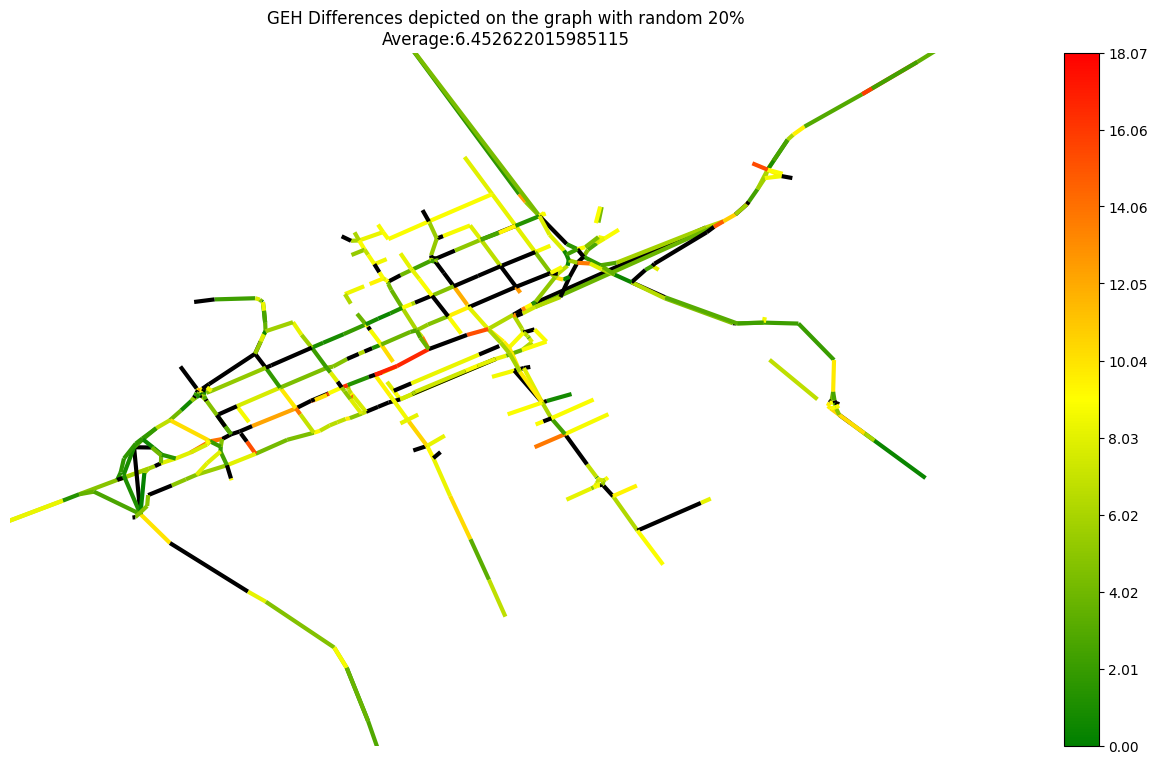

In [12]:
maxdif_r_20 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2], " random 20%" )
maxdif_r_20_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2] , " random 20%")

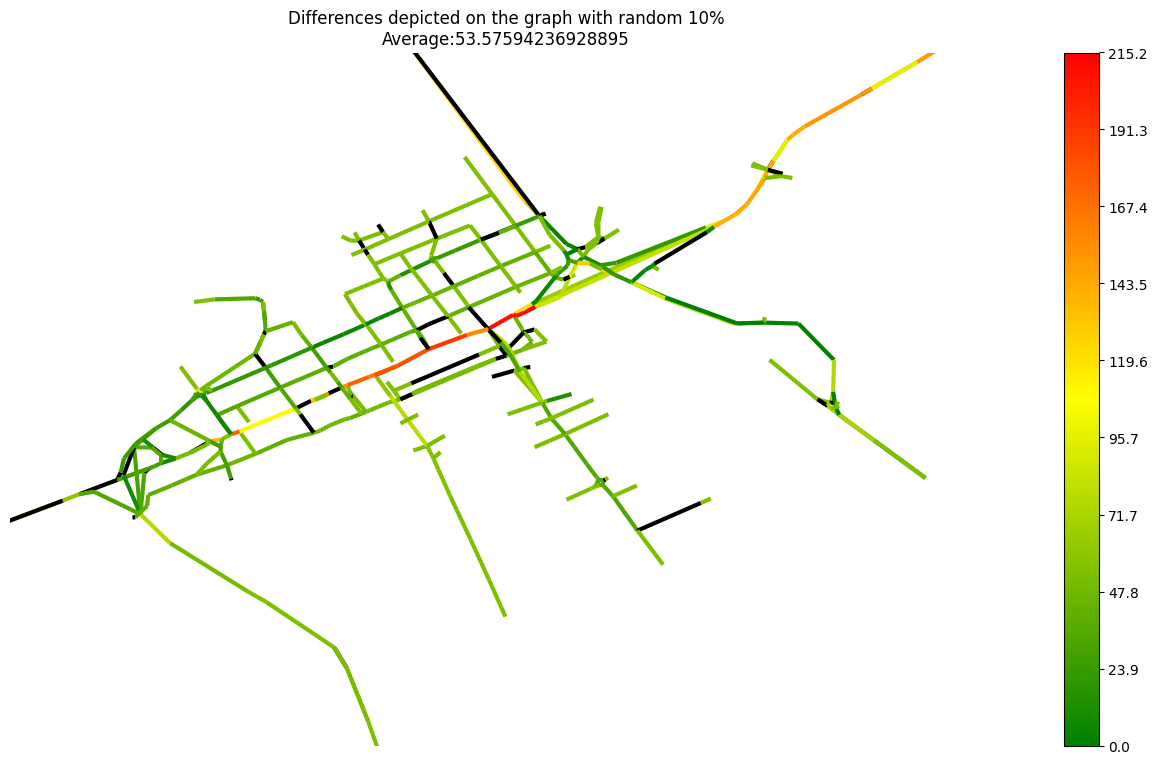

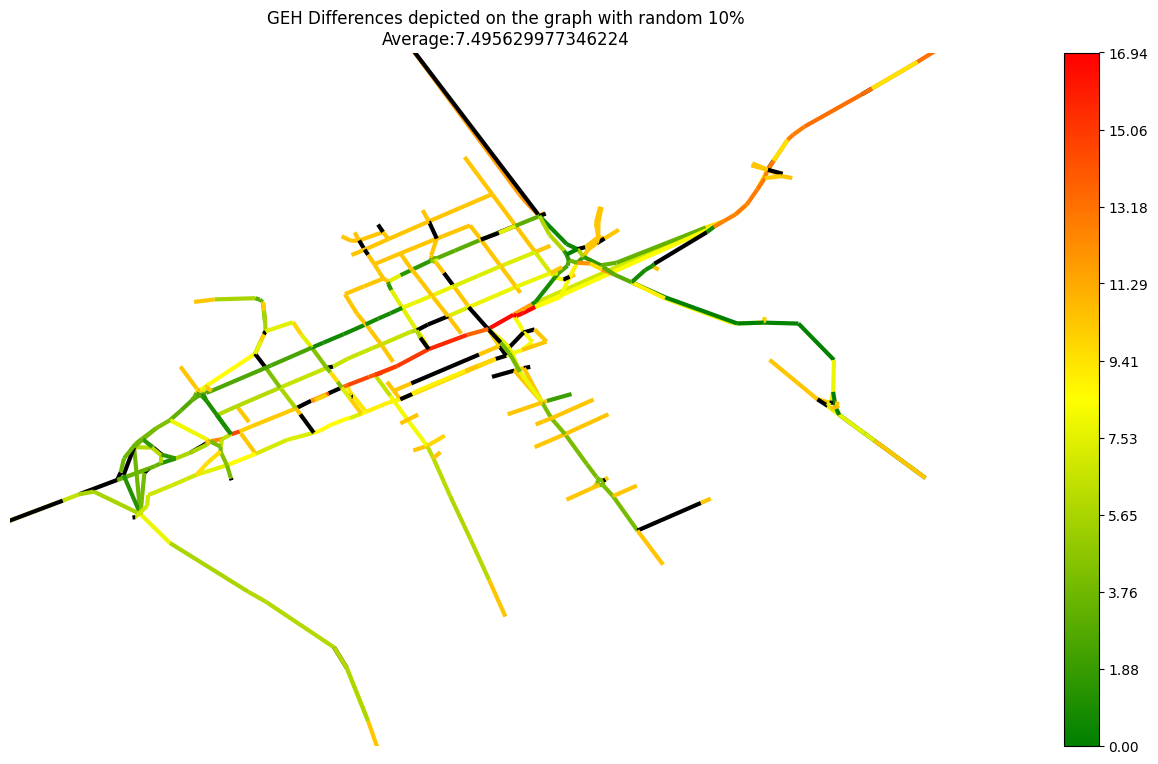

In [14]:
maxdif_r_10 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2]," random 10%" )
maxdif_r_10_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2]," random 10%" )

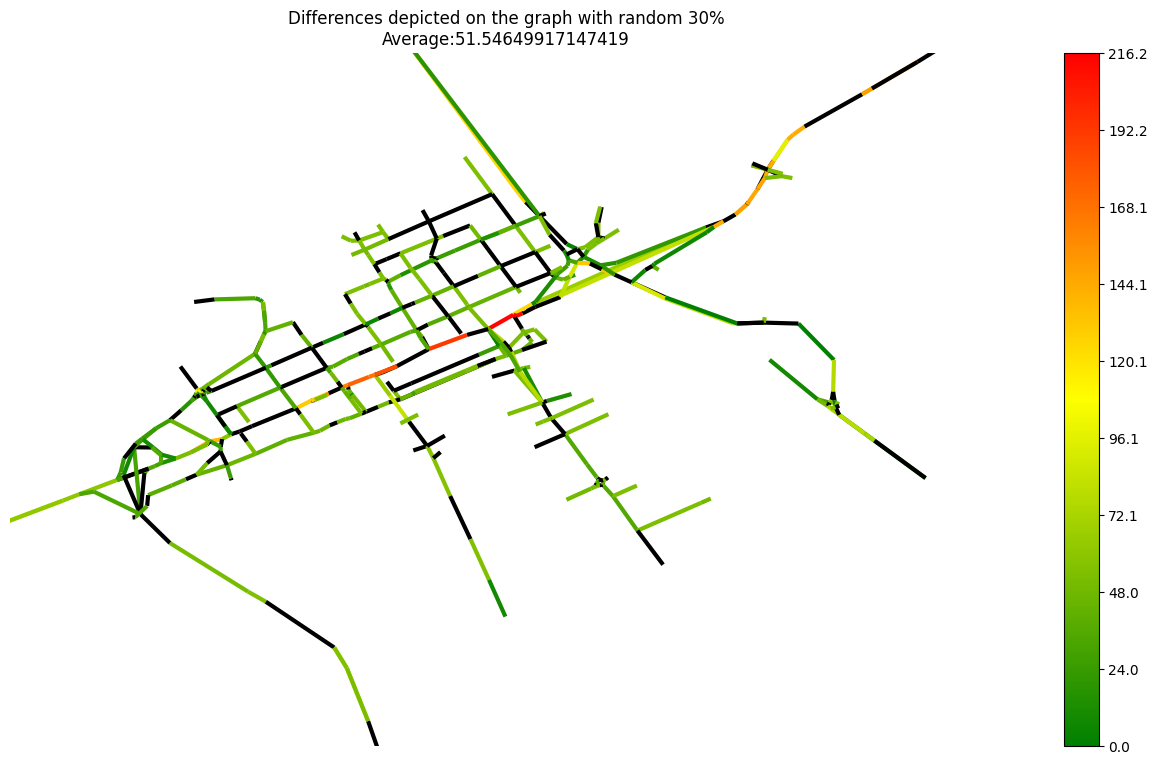

C:\Users\nemes\AppData\Local\Temp\ipykernel_12736\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


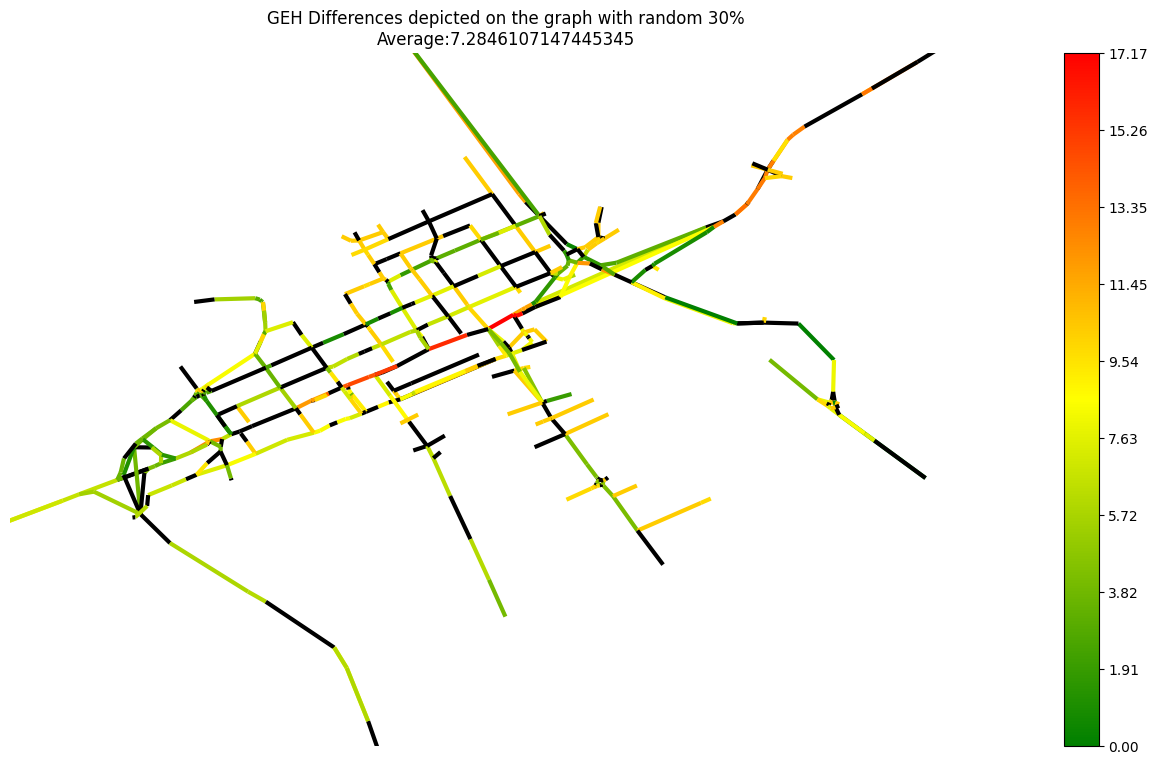

In [17]:
maxdif_r_30 = plot_graph_weight(G1, output, edges_to_hide,prepared_training_data[2]," random 30%" )
maxdif_r_30_GEH = plot_graph_weight_GEH(G1, output, edges_to_hide,prepared_training_data[2]," random 30%"  )